In [1]:
import sys
sys.path.append('../Codes/Kitas_Schools')
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from matplotlib.lines import Line2D
from datetime import datetime, timedelta
import scipy.special as sc
import os.path
import pickle
from matplotlib import style
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from IPython.display import display, Math
import matplotlib.ticker as mtick

def my_linear_func(x, a, b):
    return a + b*x
def my_quadratic_func(x, a, b, c):
    return np.log(a)+np.log(np.sqrt(-b)) + b*(x-c)**2

Text_files_path = '../../../../../Dropbox/Research/Epidemiology_2020/Text_files/Kitas_Schools/Statistics/'
print(style.available)
#style.use('seaborn-paper')
%autosave 60

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Autosaving every 60 seconds


7.969366196524218 9.028866391523435


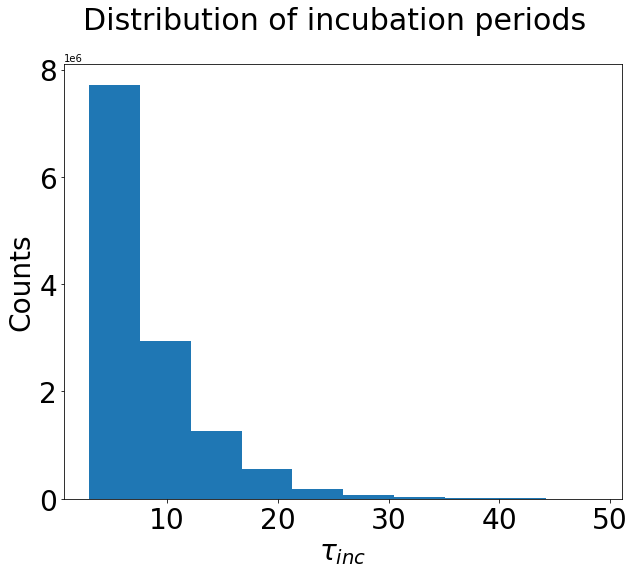

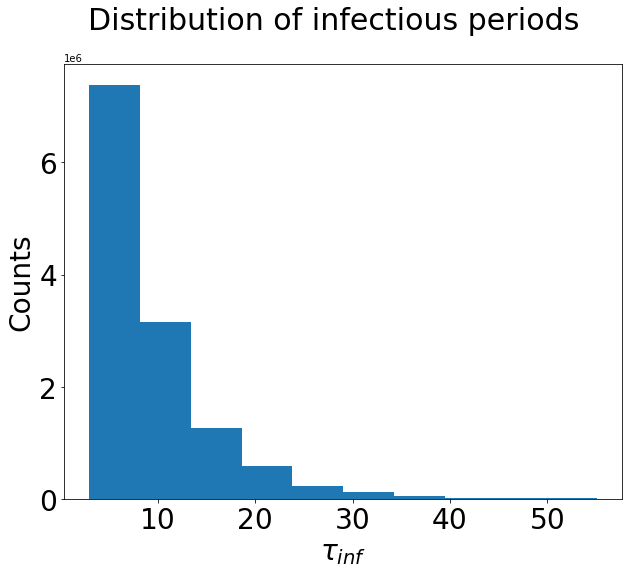

In [8]:
from matplotlib.ticker import PercentFormatter
n_ensemble = 100
n_testing_days=[0, 1, 2, 3]
testing_days=[[0], [2], [1,3], [0,2,4]]
testing_days2=["0", "2", "13", "024"]
betas=[0.18, 0.36]
p_in_s=[0.0011, 0.011]
taus=[0, 1, 2, 3]
alphas = [1, 0.6]

colors = plt.cm.Set1(range(5))
markers = ['^', '*', 'o', 's']

fig, ax = plt.subplots(figsize = (10,8))
fig2, ax2 = plt.subplots(figsize = (10,8))
Data_inc = np.array([])
Data_inf = np.array([])


for k, beta in enumerate(betas):
    for j, tau in enumerate(taus):
        for l, p_in in enumerate(p_in_s):
            means_inf = np.array([])
            means_det = np.array([])
            for i, n_testing_day in enumerate(n_testing_days):
                data_inc = np.loadtxt(Text_files_path+'tau_inc_days-%d-'%(n_testing_day)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                Data_inc = np.append(Data_inc, data_inc)
                data_inf = np.loadtxt(Text_files_path+'tau_inf_days-%d-'%(n_testing_day)+testing_days2[i]+'_beta-%.6f_pin-%.6f_tau-%d.txt'%(beta, p_in, tau))
                Data_inf = np.append(Data_inf, data_inf)

ax.hist(Data_inc)
ax.tick_params(labelsize = 28)
#ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.set_xlabel(r'$\tau_{inc}$', fontsize = 28)
ax.set_ylabel('Counts', fontsize = 28)

ax2.hist(Data_inf)
ax2.tick_params(labelsize = 28)
#ax2.yaxis.set_major_formatter(PercentFormatter(1))
ax2.set_xlabel(r'$\tau_{inf}$', fontsize = 28)
ax2.set_ylabel('Counts', fontsize = 28)

fig.suptitle('Distribution of incubation periods', fontsize = 30);
#fig.savefig('../../Figures/Kitas_Schools/statistics_infections.pdf')
#fig.savefig('../../Figures/Kitas_Schools/statistics_infections.png')

fig2.suptitle('Distribution of infectious periods', fontsize = 30);
#fig2.savefig('../../Figures/Kitas_Schools/statistics_detections.pdf')
#fig2.savefig('../../Figures/Kitas_Schools/statistics_detections.png')

print(np.mean(Data_inc), np.mean(Data_inf))